In [46]:
from utility_dfcutter import *
from utility_dfplotter import *
import utility_common as common
%matplotlib inline

In [3]:
class PlotterManager:
    def __init__(self,selection,nbjet, njet=None):
        self.selection = selection
        self.nbjet = nbjet
        self.njet  = njet
        self._setConfiguration() 
        
    def getDataFrameList(self, variation=''):
        MCzz = DFCutter(self.selection, self.nbjet, 'mcdiboson',self.njet).getDataFrame(variation)
        MCz  = DFCutter(self.selection, self.nbjet, 'mcz',      self.njet).getDataFrame(variation)
        MCw  = DFCutter(self.selection, self.nbjet, 'mcw',      self.njet).getDataFrame(variation)
        MCt  = DFCutter(self.selection, self.nbjet, 'mct',      self.njet).getDataFrame(variation)
        MCtt = DFCutter(self.selection, self.nbjet, 'mctt',     self.njet).getDataFrame(variation)
        
        # get signal MC dataframes
        MCsg = pd.concat([MCt,MCtt],ignore_index=True)
        MCsgList = [MCsg.query(q) for q in self.mcsgQueryList]
        
        # combine all dataframes as a list
        dfList = [MCzz,MCz,MCw] + MCsgList
        
        return dfList
        
    def _setConfiguration(self):
        
        # mutau
        if 'mutau' in self.selection:
            self.mcsgQueryList = [
                'genCategory in [16,21]',
                'genCategory in [1,2,3, 4,5,6,7,8,9, 10,11,12]',
                'genCategory in [17]',
                'genCategory in [18,19,20]',
                'genCategory in [13,14,15]'
            ]
            self.labelList = ['Diboson','Z+Jets','W+Jets',
                r'$tt/tW \rightarrow$ other',
                r'$tt/tW \rightarrow l + l$ (other) ',
                r'$tt/tW \rightarrow \mu + h$', 
                r'$tt/tW \rightarrow \tau + h$',
                r'$tt/tW \rightarrow \mu + \tau$',
            ]
            self.colorList = ['#a32020','#e0301e','#eb8c00','gold','springgreen','#49feec','deepskyblue','mediumpurple']
            
        
        # etau
        elif 'etau' in self.selection:
            self.mcsgQueryList = [
                'genCategory in [17,21]',
                'genCategory in [1,2,3, 4,5,6,7,8,9, 13,14,15]',
                'genCategory in [16]',
                'genCategory in [18,19,20]',
                'genCategory in [10,11,12]'
            ]
            self.labelList = ['Diboson','Z+Jets','W+Jets',
                r'$tt/tW \rightarrow$ other',
                r'$tt/tW \rightarrow l + l$ (other) ',
                r'$tt/tW \rightarrow e + h$', 
                r'$tt/tW \rightarrow \tau + h$',
                r'$tt/tW \rightarrow e + \tau$',
            ]
            self.colorList = ['#a32020','#e0301e','#eb8c00','gold','springgreen','#49feec','deepskyblue','mediumpurple']



In [64]:
selection = 'etau'
pmng = PlotterManager(selection,'==1')
df_list = pmng.getDataFrameList()

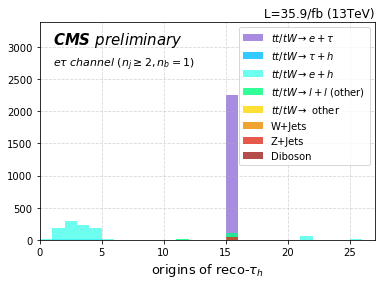

In [66]:
v,a,b,step,xl = 'tauGenFlavor',0,27,1,r'origins of reco-$\tau_h$'

mybin         = np.arange(a,b,step)
variable_list = [mc[v].values for mc in df_list]
weight_list   = [mc['eventWeight'].values for mc in df_list]

    

plt.figure(facecolor='w')
# 1.1. show MC
mc = plt.hist(variable_list, weights = weight_list,
            label   = pmng.labelList,
            color   = pmng.colorList,
            bins    = mybin,
            lw=0, alpha=0.8, 
            histtype='stepfilled', 
            )
mc = mc[0][-1] # keep only the stacked histogram, ignore the bin edges

plt.grid(True,linestyle='--',alpha=0.5)
plt.xlim(a, b)
plt.ylim(1,1.5*mc.max())
plt.text(0.04*b+0.96*a, 1.35*mc.max(), r'CMS $preliminary$',style='italic',fontsize='15',fontweight='bold')
plt.text(0.04*b+0.96*a, 1.2*mc.max(), r'$e\tau$ channel $(n_j\geq 2,n_b =1 )$ ',style='italic',fontsize='11')


plt.legend()
plt.xlabel(xl,fontsize=13)


plt.title('L=35.9/fb (13TeV)',loc='right')
plt.savefig(common.getBaseDirectory()+'plots/misid/origin_{}_1b.png'.format(selection), dpi=300)

In [15]:
mc 



[array([ 0.        ,  3.47333336,  2.34167879,  2.20116354,  1.03671092,
         0.70262995,  0.45138157,  0.72303227,  0.53187678,  0.64025705,
         0.34991016,  0.23166147,  0.16924317,  0.1716972 ,  0.20410029,
         0.30883472,  0.04096941,  0.28820563,  0.2685747 ,  0.45208258,
         0.10389206,  0.02115726,  0.31216276,  0.04152334,  0.10298924]),
 array([   0.        ,  104.86893231,   64.29651583,   56.93998831,
          31.96449934,   42.76546914,   -6.26942892,   -1.91572929,
           9.47875407,   16.81695159,    3.03795173,    9.87347918,
          -6.89691537,   18.0191228 ,    6.58192846,    2.65668649,
          -3.42571966,    2.54341267,    2.36717013,   -1.76929063,
          -2.56364629,    2.43951473,    0.        ,    0.        ,
          -2.60012926]),
 array([  0.        ,  74.00598426,  45.19925381,  17.83054527,
         12.12639437,   8.12115712,  12.44083692,   1.56896401,
          1.81697558,   1.52499229,   0.        ,   2.07991424,
        